In [1]:
import os
import csv  
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps

# Ignore matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd



In [2]:

file_path = os.path.join('D:\\', 'hotaidata')
x=[]
y=[]
vx=[]
vy=[]
isvalid=[]
xtmp=[]
ytmp=[]
vxtmp=[]
vytmp=[]
isvalidtmp=[]
for root,dirs,files in os.walk(file_path):
    #print(root)
    
    for dir in dirs:
        #print(os.path.join(root,file))

            with open(os.path.join(root,dir,'B00001.dat'), 'r') as f:  
                lines = f.readlines()
                for line in lines[3:]: 
                    num=line.split()
                    xtmp.append(float(num[0]))
                    ytmp.append(float(num[1]))
                    vxtmp.append(float(num[2]))
                    vytmp.append(float(num[3]))
                    isvalidtmp.append(float(num[4]))

            x.append(np.array(xtmp).reshape(25,25))
            y.append(np.array(ytmp).reshape(25,25))
            vx.append(np.array(vxtmp).reshape(25,25))
            vy.append(np.array(vytmp).reshape(25,25))
            isvalid.append(np.array(isvalidtmp).reshape(25,25))
            xtmp=[]
            ytmp=[]
            vxtmp=[]
            vytmp=[]
            isvalidtmp=[]
x=np.array(x)

y=np.array(y)
vx=np.array(vx)
vx=vx.reshape(120,25,25)
vy=np.array(vy)
isvalid=np.array(isvalid)

vx=vx.T
vy=vy.T
t=np.linspace(0,1,120)
print(len(t))
dt=t[1]-t[0]

vx_dot = ps.FiniteDifference(axis=1)._differentiate(vx, t=dt)
#x=x.reshape(100,25,25)
print(vx_dot.shape)
#print(vx[50])
print('x0')
print(x[0][0])
spatial_grid = np.asarray([x[0][0], y[0][0]]).T
#print(spatial_grid)


n=25
u_train=np.zeros((n, n, len(t), 2))
u_train[:, :, :, 0] = vx
u_train[:, :, :, 1] = vy
u_dot_train = ps.FiniteDifference(axis=2)._differentiate(u_train, dt)
#print(u_train)

120
(25, 25, 120)
x0
[-35.05476832 -31.81270432 -28.57064033 -25.32857633 -22.08651233
 -18.84444833 -15.60238433 -12.36032033  -9.11825633  -5.87619233
  -2.63412833   0.60793567   3.84999967   7.09206367  10.33412766
  13.57619166  16.81825566  20.06031966  23.30238366  26.54444766
  29.78651166  33.02857566  36.27063966  39.51270366  42.75476766]


In [3]:
# get test data

file_path = os.path.join('D:\\', 'hotaidata')
x=[]
y=[]
vx=[]
vy=[]
isvalid=[]
xtmp=[]
ytmp=[]
vxtmp=[]
vytmp=[]
isvalidtmp=[]
for root,dirs,files in os.walk(file_path):
    #print(root)
    
    for dir in dirs:
        #print(os.path.join(root,file))

            with open(os.path.join(root,dir,'B00002.dat'), 'r') as f:  
                lines = f.readlines()
                for line in lines[3:]: 
                    num=line.split()
                    xtmp.append(float(num[0]))
                    ytmp.append(float(num[1]))
                    vxtmp.append(float(num[2]))
                    vytmp.append(float(num[3]))
                    isvalidtmp.append(float(num[4]))

            x.append(np.array(xtmp).reshape(25,25))
            y.append(np.array(ytmp).reshape(25,25))
            vx.append(np.array(vxtmp).reshape(25,25))
            vy.append(np.array(vytmp).reshape(25,25))
            isvalid.append(np.array(isvalidtmp).reshape(25,25))
            xtmp=[]
            ytmp=[]
            vxtmp=[]
            vytmp=[]
            isvalidtmp=[]
x=np.array(x)

y=np.array(y)
vx=np.array(vx)
vx=vx.reshape(120,25,25)
vy=np.array(vy)
isvalid=np.array(isvalid)

vx=vx.T
vy=vy.T
t=np.linspace(0,1,120)
print(len(t))
dt=t[1]-t[0]

vx_dot = ps.FiniteDifference(axis=1)._differentiate(vx, t=dt)
#x=x.reshape(100,25,25)
print(vx_dot.shape)
#print(vx[50])
print('x0')
print(x[0][0])
spatial_grid = np.asarray([x[0][0], y[0][0]]).T
print(spatial_grid)


n=25
u_test=np.zeros((n, n, len(t), 2))
u_test[:, :, :, 0] = vx
u_test[:, :, :, 1] = vy
u_dot_test = ps.FiniteDifference(axis=2)._differentiate(u_test, dt)



120
(25, 25, 120)
x0
[-35.05476832 -31.81270432 -28.57064033 -25.32857633 -22.08651233
 -18.84444833 -15.60238433 -12.36032033  -9.11825633  -5.87619233
  -2.63412833   0.60793567   3.84999967   7.09206367  10.33412766
  13.57619166  16.81825566  20.06031966  23.30238366  26.54444766
  29.78651166  33.02857566  36.27063966  39.51270366  42.75476766]
[[-35.05476832  35.25746989]
 [-31.81270432  35.25746989]
 [-28.57064033  35.25746989]
 [-25.32857633  35.25746989]
 [-22.08651233  35.25746989]
 [-18.84444833  35.25746989]
 [-15.60238433  35.25746989]
 [-12.36032033  35.25746989]
 [ -9.11825633  35.25746989]
 [ -5.87619233  35.25746989]
 [ -2.63412833  35.25746989]
 [  0.60793567  35.25746989]
 [  3.84999967  35.25746989]
 [  7.09206367  35.25746989]
 [ 10.33412766  35.25746989]
 [ 13.57619166  35.25746989]
 [ 16.81825566  35.25746989]
 [ 20.06031966  35.25746989]
 [ 23.30238366  35.25746989]
 [ 26.54444766  35.25746989]
 [ 29.78651166  35.25746989]
 [ 33.02857566  35.25746989]
 [ 36.2706

In [5]:
# Define PDE library that is quadratic in u, and
# fourth-order in spatial derivatives of u.
library_functions = [
    lambda y: y,
    lambda x: x * x * x,
    lambda x, y: x * y * y,
    lambda x, y: x * x * y,
]
library_function_names = [
    lambda y: y,
    lambda x: x + x + x,
    lambda x, y: x + y + y,
    lambda x, y: x + x + y,
]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=2,
    spatial_grid=spatial_grid,
    include_bias=True,
    is_uniform=True,
    periodic=True
)


# Again, loop through all the optimizers
#print('STLSQ model: ')

print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=50, alpha=1e-5, 
                     normalize_columns=True, max_iter=200)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer,feature_names=['Vx','Vy'])
model.fit(u_train, x_dot=u_dot_train)
model.print()
print(u_train.shape)
print(u_train[0].shape)
print(u_train[0][0].shape)

print('SINDy')
model = ps.SINDy(feature_names=['x','y'])

model.fit(u_train, x_dot=u_dot_train)
model.print()
u_dot_stlsq = model.predict(u_test)



STLSQ model: 
(Vx)' = 4.575 1 + 3.305 Vx + 1.079 Vy + -0.029 VxVxVx + -0.006 VyVyVy + -0.011 VxVyVy + -0.014 VxVxVy + -0.619 Vx_1 + -5.501 Vy_1 + 9.561 Vx_11 + -0.871 Vy_11 + -5.405 VxVx_1 + -0.323 VxVy_1 + 0.005 VyVx_1 + -0.001 VyVy_1 + 0.014 VxVxVxVx_1 + -0.003 VxVxVxVy_1 + 0.346 VyVyVyVx_1 + 1.541 VyVyVyVy_1 + 0.011 VxVyVyVx_1 + -0.001 VxVyVyVy_1 + -0.001 VxVxVyVx_1 + -0.008 VxVxVyVy_1 + -5.244 VxVx_11 + 4.178 VxVy_11 + -0.003 VyVx_11 + -0.005 VyVy_11 + 0.026 VxVxVxVx_11 + -0.036 VxVxVxVy_11 + -5.224 VyVyVyVx_11 + -0.534 VyVyVyVy_11 + 0.021 VxVyVyVx_11 + -0.001 VxVyVyVy_11 + 0.001 VxVxVyVx_11 + -0.011 VxVxVyVy_11
(Vy)' = 0.638 1 + -2.488 Vx + 0.754 Vy + -0.005 VxVxVx + -0.003 VyVyVy + -0.001 VxVyVy + -0.049 VxVxVy + -6.976 Vy_1 + -5.748 Vx_11 + -1.022 Vy_11 + 0.048 VxVx_1 + 7.404 VxVy_1 + -0.006 VyVx_1 + -0.011 VyVy_1 + 0.012 VxVxVxVx_1 + -0.010 VxVxVxVy_1 + -10.912 VyVyVyVx_1 + -0.165 VyVyVyVy_1 + 0.003 VxVyVyVx_1 + -0.001 VxVyVyVy_1 + 0.013 VxVxVyVx_1 + -0.001 VxVxVyVy_1 + 1.264 V

[[ 5.77421034 -0.64501789]
 [ 5.77421034 -0.64501789]
 [ 5.77421034 -0.64501789]
 ...
 [ 5.77421034 -0.64501789]
 [ 5.77421034 -0.64501789]
 [ 5.77421034 -0.64501789]]
(75000, 2)


ValueError: x and y can be no greater than 2D, but have shapes (25,) and (25, 120, 2)

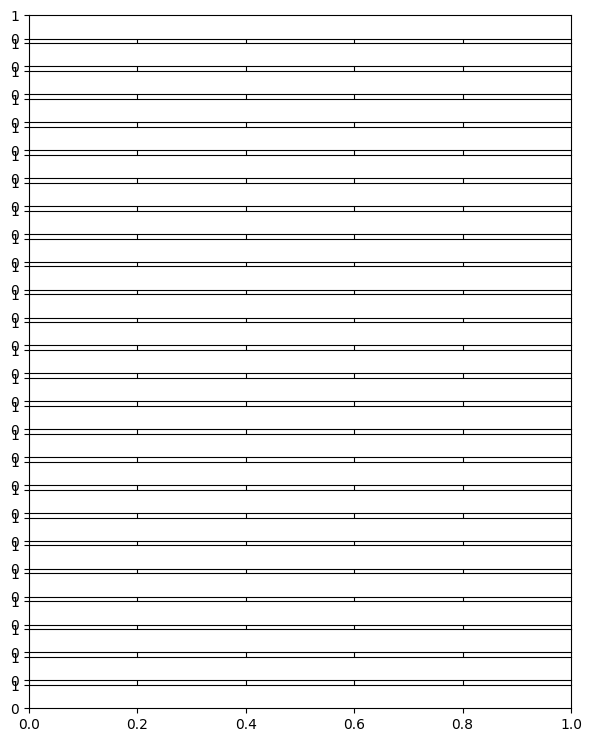

In [14]:
# the data structure still has something wrong

t_test=np.arange(0,25,1)
# Predict derivatives using the learned model
x_dot_test_predicted = model.predict(u_test)
print(x_dot_test_predicted)
print(x_dot_test_predicted.shape)
# Compute derivatives with a finite difference method, for comparison
x_dot_test_computed = model.differentiate(u_test, t=dt)

fig, axs = plt.subplots(u_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(u_test.shape[1]):
    axs[i].plot(t_test, x_dot_test_computed[:, i], "k", label="numerical derivative")
    axs[i].plot(t_test, x_dot_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$\dot x_{}$".format(i))
fig.show()